In [3]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 600,600

In [4]:
def validate_double_bonds(double_bonds: list[int] | list[str]) -> list[tuple[int, str]]:
    validated_double_bonds = []

    for double_bond in list(set(map(str, double_bonds))):
        position, direction = (int(double_bond[0:-1]), double_bond[-1]) if double_bond[-1] in ['Z', 'E'] else (int(double_bond), '')
        validated_double_bonds.append((position, direction))

    validated_double_bonds = sorted(validated_double_bonds)

    last_position = 0
    last_direction = 'E'
    for double_bond in validated_double_bonds:
        if last_direction == 'E' and double_bond[0] == last_position + 1:
            raise ValueError("An 'E' double bond directly after another is not possible in fatty acid chains.")
        elif last_direction == 'Z' and double_bond[0] <= last_position + 2:
            raise ValueError("A 'Z' double bond directly after another is not possible in fatty acid chains.")
        last_position = double_bond[0]
        last_direction = double_bond[1]

    return validated_double_bonds


def generate_fatty_acid(length: int, double_bonds: list[int] | list[str]):
    if len == 0:
        return 'OH'

    fatty_acid = ''
    index = 1

    for double_bond in validate_double_bonds(double_bonds):
        position, direction = double_bond
        if position >= length -1:
            raise ValueError(f"Double bond position { position } is invalid in a fatty acid of length { length }.")

        fatty_acid = fatty_acid + ('C' * (position - index - 1)) + "\\C=C" + ("/" if direction == 'Z' else "\\")
        index = position + 1
    fatty_acid = fatty_acid + ('C' * (length - index))
    fatty_acid = fatty_acid.replace('//', '/')

    return Chem.MolFromSmiles(fatty_acid + '(O)=O')


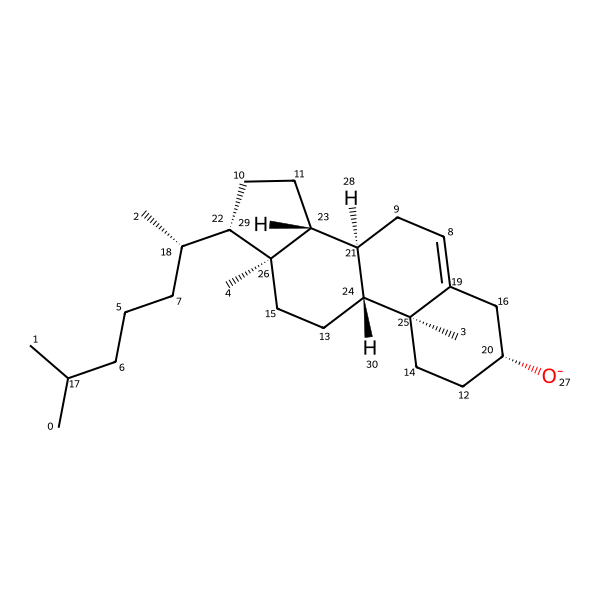

In [5]:
SE27_1 = "InChI=1S/C27H45O/c1-18(2)7-6-8-19(3)23-11-12-24-22-10-9-20-17-21(28)13-15-26(20,4)25(22)14-16-27(23,24)5/h9,18-19,21-25H,6-8,10-17H2,1-5H3/q-1/t19-,21+,22+,23-,24+,25+,26+,27-/m0/s1"

head_group = Chem.MolFromInchi(SE27_1)
head_group

In [6]:
sn1 = 27

fatty_acid_sn1_length = 18
fatty_acid_sn1_double_bonds = 1

In [7]:
head_group_bond_atom1 = head_group.GetAtomWithIdx(sn1)
head_group_bond_atom1.SetFormalCharge(0)
head_group_bond_atom1.UpdatePropertyCache()

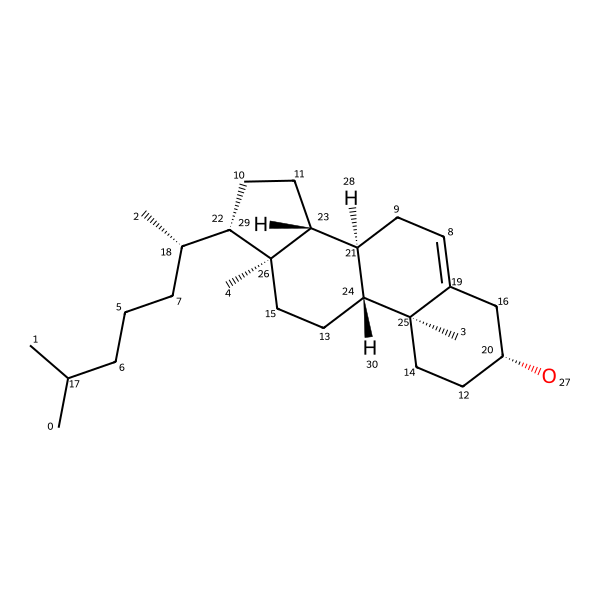

In [8]:
head_group

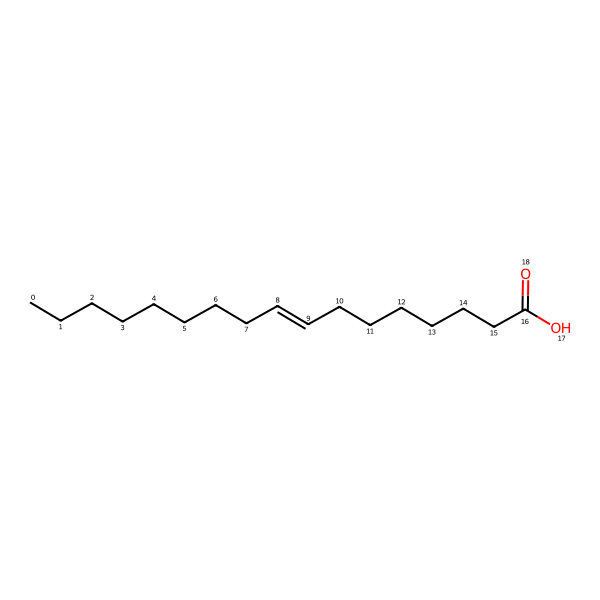

In [9]:
fatty_acid_sn1 = generate_fatty_acid(fatty_acid_sn1_length, [10])
fatty_acid_sn1

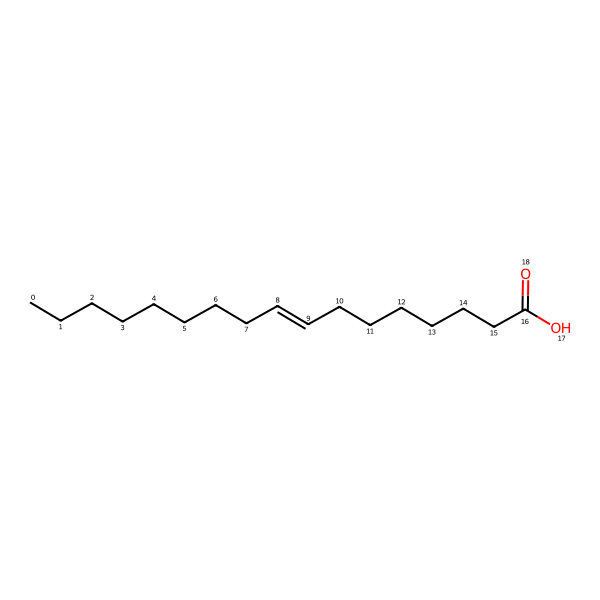

In [10]:
fatty_acid_sn1

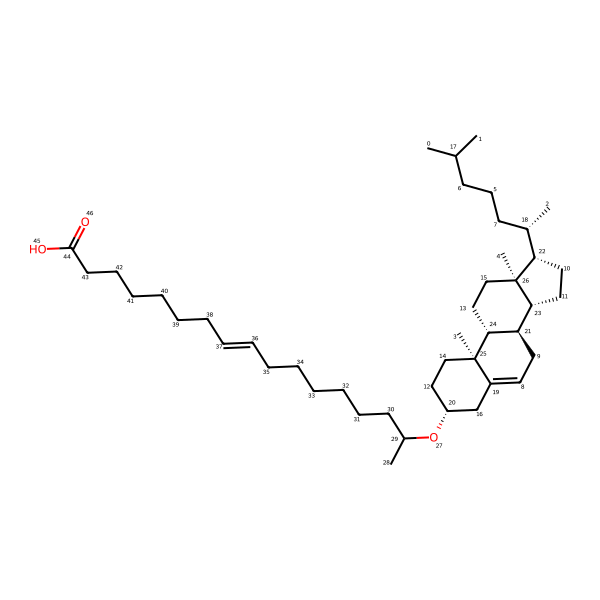

In [11]:
m1_2 = Chem.CombineMols(head_group, fatty_acid_sn1)
m1_2 = Chem.EditableMol(m1_2)
m1_2.AddBond(sn1, max(range(head_group.GetNumAtoms())) + 2, order=Chem.rdchem.BondType.SINGLE)
m1_2 = m1_2.GetMol()
m1_2